In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df.drop(['Cabin','Name','PassengerId'],axis=1,inplace=True)
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

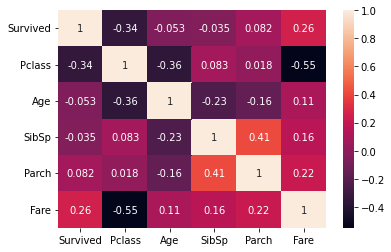

In [ ]:
cor=df.corr()
sns.heatmap(cor,annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
en=LabelEncoder()
df["Sex"]=en.fit_transform(df["Sex"])
df["Ticket"]=en.fit_transform(df["Ticket"])
df["Embarked"]=en.fit_transform(df["Embarked"])

In [ ]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,24.0,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


In [ ]:
x=df.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,2
1,1,0,38.0,1,0,596,71.2833,0
2,3,0,26.0,0,0,669,7.9250,2
3,1,0,35.0,1,0,49,53.1000,2
4,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,101,13.0000,2
887,1,0,19.0,0,0,14,30.0000,2
888,3,0,24.0,1,2,675,23.4500,2
889,1,1,26.0,0,0,8,30.0000,0


In [ ]:
y=df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(x)
X

array([[ 0.82737724,  0.73769513, -0.49779327, ...,  0.91896631,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.71504807, ...,  1.28262456,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.19458293, ...,  1.64628282,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.3461881 , ...,  1.67617254,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.19458293, ..., -1.64656796,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.26023257, ...,  0.63501397,
        -0.49237783, -0.67817453]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
df1=pd.read_csv('/content/titanic_test.csv')
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df1['Age']=df1['Age'].fillna(df1['Age'].mode()[0])
df1['Fare']=df1['Fare'].fillna(df1['Fare'].mode()[0])
df1.drop(['Cabin','Name','PassengerId'],axis=1,inplace=True)

In [ ]:
df1["Sex"]=en.fit_transform(df1["Sex"])
df1["Ticket"]=en.fit_transform(df1["Ticket"])
df1["Embarked"]=en.fit_transform(df1["Embarked"])

In [ ]:
df1.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df1

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,152,7.8292,1
1,3,0,47.0,1,0,221,7.0000,2
2,2,1,62.0,0,0,73,9.6875,1
3,3,1,27.0,0,0,147,8.6625,2
4,3,0,22.0,1,1,138,12.2875,2
...,...,...,...,...,...,...,...,...
413,3,1,21.0,0,0,267,8.0500,2
414,1,0,39.0,0,0,324,108.9000,0
415,3,1,38.5,0,0,346,7.2500,2
416,3,1,21.0,0,0,220,8.0500,2


In [ ]:
from tensorflow.keras.models import Sequential
ann=Sequential()

In [ ]:
ann=keras.models.Sequential([keras.layers.Dense(10,activation='relu'),keras.layers.Dense(10,activation='relu'),keras.layers.Dense(10,activation='relu'),keras.layers.Dense(10,activation='relu'),keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [ ]:
ann.fit(X_train,y_train,epochs=10,batch_size=50)

Epoch 1/10
13/13 [==============================] - 1s 2ms/step - loss: 0.7036 - Accuracy: 0.3981
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6858 - Accuracy: 0.6260
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6719 - Accuracy: 0.7368
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6568 - Accuracy: 0.7496
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6358 - Accuracy: 0.7753
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6098 - Accuracy: 0.7801
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5794 - Accuracy: 0.7849
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5479 - Accuracy: 0.7849
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5173 - Accuracy: 0.7769
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4882 - Accuracy: 0.7769


In [ ]:
y_pred=ann.predict(X_test)
y_pred=y_pred>0.5

9/9 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

75.0


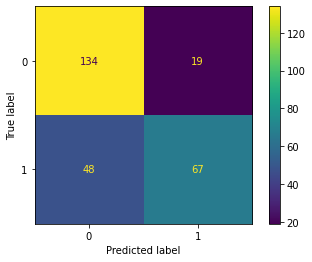

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
sc_df1=sc.transform(df1)
y_pred1=ann.predict(sc_df1)

14/14 [==============================] - 0s 2ms/step


In [ ]:
y_pred1=y_pred1>0.5

In [ ]:
y_pred1

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [